# Detect Faces and Blur Faces
### Complete # TODO

# Requirements

In [ ]:
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Load Models

In [ ]:
# Define the path to the prototxt file using os.path.join for cross-platform compatibility
prototxt_path = os.path.join("models", "deploy.prototxt")

# Define the path to the caffemodel file using os.path.join for cross-platform compatibility
model_path = os.path.join("models", "res10_300x300_ssd_iter_140000_fp16.caffemodel")

# Load the pre-trained Caffe model from the specified files
# The readNetFromCaffe function loads the network architecture from the prototxt file and the trained weights from the caffemodel file
model = None # TODO


# Face Detection and Blur Function

In [ ]:
def face_blur(image: np.ndarray):
    # Create a copy of the input image to avoid modifying the original image (critical)
    image = None # TODO
    # Get the height and width of the image
    h, w = None # TODO

    # Define the kernel width and height for Gaussian blurring
    # Ensure they are odd numbers by performing a bitwise OR with 1
    kernel_width = (w // 7) | 1
    kernel_height = (h // 7) | 1

    # Create a blob from the image for input to the neural network
    blob = None # TODO

    # Set the input for the network
    # TODO

    # Perform forward pass to get the output detections
    output = np.squeeze(model.forward())

    # Loop over all detections
    for i in range(0, output.shape[0]):
        # Get the confidence of the detection
        confidence = output[i, 2]

        # Proceed only if the confidence is above the threshold (0.4)
        if confidence > 0.4:
            # Get the bounding box coordinates and scale them to the original image size
            box = output[i, 3:7] * np.array([w, h, w, h])
            start_x, start_y, end_x, end_y = box.astype(int)

            # Extract the face region from the image
            face = None # TODO

            # Apply Gaussian blur to the face region
            face = None # TODO

            # Replace the original face region with the blurred face
            # TODO

    # Return the modified image with blurred faces
    return image


# Result on Image

In [ ]:
# Define the path to the image file using os.path.join for cross-platform compatibility
image_path = os.path.join("images", "musk.jpg")

# Read the input image from the specified path
image = None # TODO

# Convert the image from RGB to BGR format (as OpenCV uses BGR by default)
image = None # TODO

# Apply the face_blur function to the image to blur detected faces
image_face_blur = None # TODO


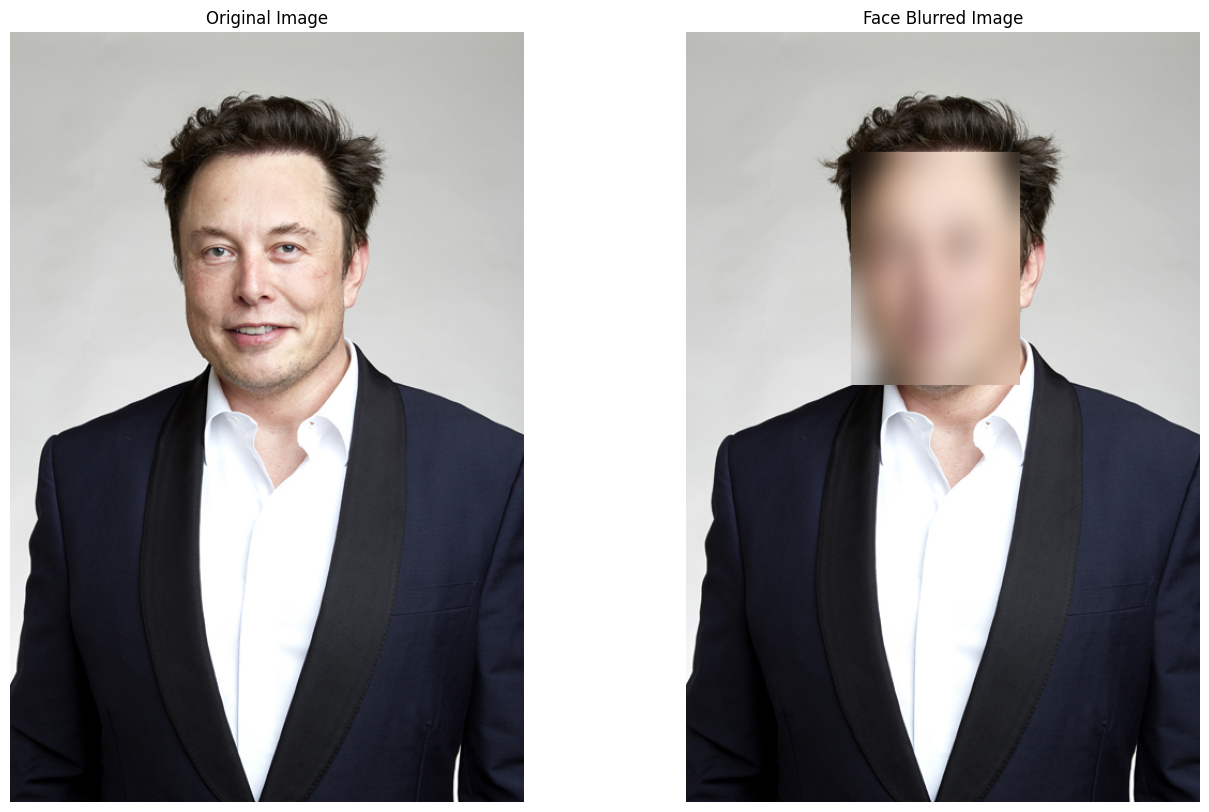

In [ ]:
# Create a figure with specified size
# TODO

# Display the original image in the first subplot
# TODO

# Result on WebCam Video Stream

In [5]:
def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    # If it's grayscale, set the text color to white; if colored, set the text color to green.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.

    # Define the row size for the text placement.
    row_size = 20 
    # Define the left margin for the text placement.
    left_margin = 24 

    # Set the font size and thickness for the text.
    font_size = 1
    font_thickness = 2

    # Format the FPS value into a string for displaying.
    fps_text = "FPS = {:.1f}".format(fps)
    # Set the text location on the image.
    text_location = (left_margin, row_size)
    
    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    # Return the modified image with the FPS text.
    return image


In [ ]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)  # Initialize video capture with the specified camera device ID

        while True:  # Infinite loop to continuously capture frames
            start_time = None # TODO  # Record the start time to calculate FPS

            _, frame = None # TODO  # Capture a single frame from the camera

            frame = None # TODO  # Resize the frame to the specified dimensions
            frame = None # TODO  # Apply the face_blur function to the frame

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps)) 

            end_time = None # TDOD  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = None # TODO
            # Calculate FPS based on the time taken to process the frame
            fps = None # TODO

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the camera resource


In [ ]:
# Define the path to the video file using os.path.join for cross-platform compatibility
CAMERA_DEVICE_ID = os.path.join("videos", "Jobs_2.mp4")
# Constants for video settings
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 0  # Initial Frames Per Second (FPS) value
FRAME_RATE = 30  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = None # TODO  # Initialize video capture with the specified video file path

        while True:  # Infinite loop to continuously capture frames
            start_time = None # TODO # Record the start time to calculate FPS

            _, frame = None # TODO  # Capture a single frame from the video
            frame = None # TODO  # Resize the frame to the specified dimensions
            frame = None # TODO  # Apply the face_blur function to the frame

            end_time = None # TODO # Record the end time to calculate FPS
            seconds = None # TODO # Calculate the time taken to process the frame

            if seconds < DURATION:  # If the processing time is less than the desired frame duration, wait for the remaining time
                time.sleep(DURATION - seconds)

            seconds = None # TODO # Recalculate the time taken to process the frame including sleep time
            fps = None # TODO  # Calculate FPS based on the time taken to process the frame

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource
